In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv("../data/cleaned/cleaned_dataset.csv")

df.head()
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   OrderYear        1000 non-null   int64  
 8   OrderMonth       1000 non-null   int64  
 9   CustomerName     1000 non-null   object 
 10  Region           1000 non-null   object 
 11  SignupDate       1000 non-null   object 
 12  ProductName      1000 non-null   object 
 13  Category         1000 non-null   object 
 14  Price_y          1000 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 117.3+ KB


In [2]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df["Month"] = df["TransactionDate"].dt.to_period("M")

df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,OrderYear,OrderMonth,CustomerName,Region,SignupDate,ProductName,Category,Price_y,Month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024,8,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024,5,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024,4,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024,3,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024,3,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03


In [3]:
total_revenue = df["TotalValue"].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 689995.56


In [4]:
monthly_revenue = (
    df.groupby("Month")["TotalValue"]
    .sum()
    .reset_index()
    .sort_values("Month")
)

monthly_revenue.head()

,Month,TotalValue
0,2023-12,3769.52
1,2024-01,66376.39
2,2024-02,51459.27
3,2024-03,47828.73
4,2024-04,57519.06


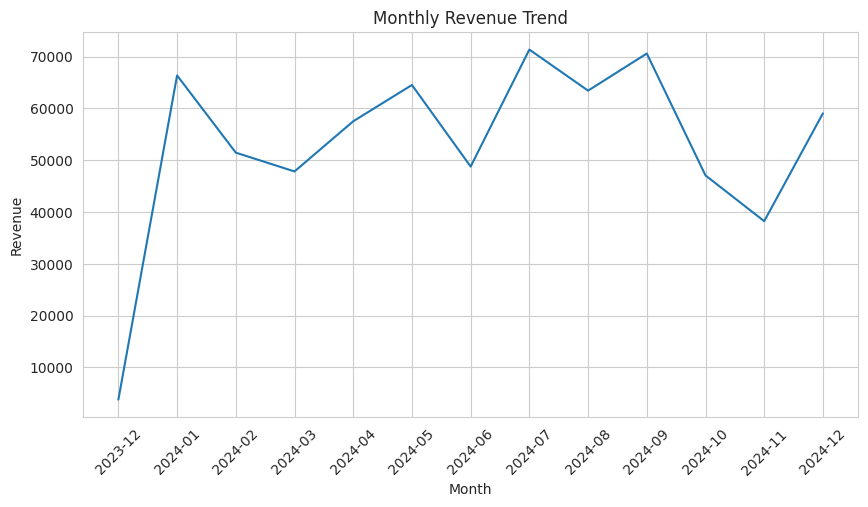

In [5]:
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue["Month"].astype(str),
         monthly_revenue["TotalValue"])
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

**Which Category Generates the Highest Revenue?**
*SQL Query*

SELECT Category, SUM(TotalValue) AS category_revenue
FROM transactions
GROUP BY Category
ORDER BY category_revenue DESC;

In [6]:
category_revenue = (
    df.groupby("Category")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
)

category_revenue

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

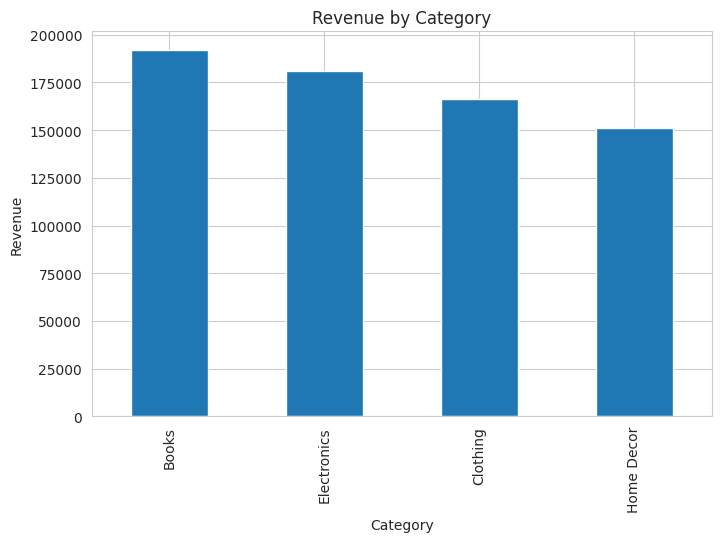

In [7]:
category_revenue.plot(kind="bar", figsize=(8,5))
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

**What are the top 5 products by revenue?**

*SQL Equivalent Query:*

SELECT ProductName, SUM(TotalValue) AS total_revenue
FROM transactions
GROUP BY ProductName
ORDER BY total_revenue DESC
LIMIT 5;

In [8]:
top_products = (
    df.groupby(["ProductID", "ProductName"])["TotalValue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_products

ProductID  ProductName       
P029       TechPro Headphones    19513.80
P079       ActiveWear Rug        17946.91
P048       TechPro Cookbook      17905.20
P020       ActiveWear Jacket     15060.92
P062       HomeSense Novel       14592.24
Name: TotalValue, dtype: float64

In [9]:
top_customers = (
    df.groupby(["CustomerID", "CustomerName"])["TotalValue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_customers

CustomerID  CustomerName 
C0141       Paul Parsons     10673.87
C0054       Bruce Rhodes      8040.39
C0065       Gerald Hines      7663.70
C0156       William Adams     7634.45
C0082       Aimee Taylor      7572.91
Name: TotalValue, dtype: float64

In [10]:
monthly_revenue.to_csv("../outputs/monthly_revenue.csv", index=False)
category_revenue.to_csv("../outputs/category_revenue.csv")
top_products.to_csv("../outputs/top_products.csv")
top_customers.to_csv("../outputs/top_customers.csv")

**1.Describe Statistics**

In [11]:
df.describe()


,TransactionDate,Quantity,TotalValue,Price_x,OrderYear,OrderMonth,Price_y
count,1000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023.996000,6.288000,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2023.000000,1.000000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2024.000000,3.000000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2024.000000,6.000000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024.000000,9.000000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024.000000,12.000000,497.76000
std,NaN,1.117981,493.144478,140.73639,0.063151,3.437859,140.73639


In [12]:
df["Category"].value_counts()
df["Region"].value_counts()

Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64

**Histogram Of Revenue**

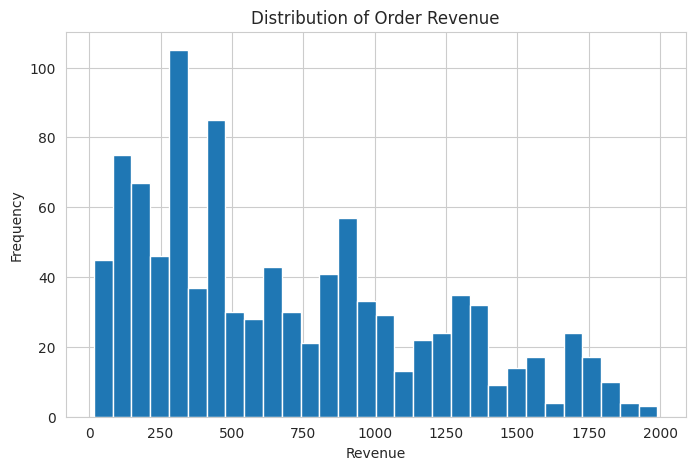

In [13]:
plt.figure(figsize=(8,5))
df["TotalValue"].hist(bins=30)
plt.title("Distribution of Order Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

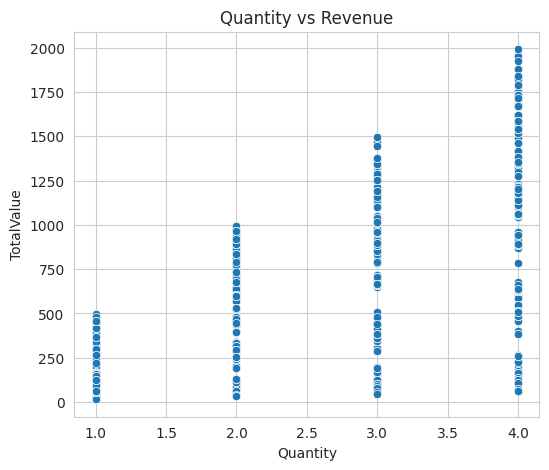

In [14]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="Quantity", y="TotalValue", data=df)
plt.title("Quantity vs Revenue")
plt.show()

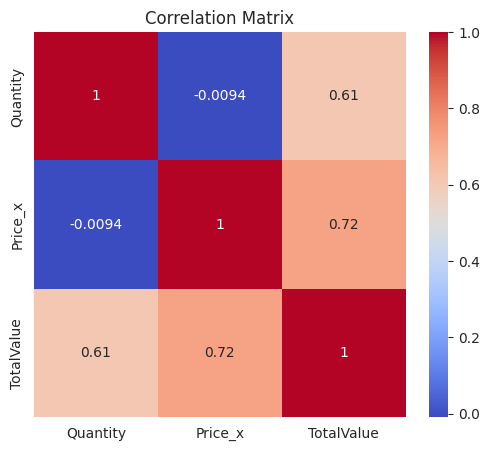

In [15]:
corr = df[["Quantity", "Price_x", "TotalValue"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [16]:
df.rename(columns={"Price_x": "UnitPrice"}, inplace=True)
df.drop(columns=["Price_y"], inplace=True)

In [17]:
corr = df[["Quantity", "UnitPrice", "TotalValue"]].corr()